Dataset is retrieved from here: https://www.kaggle.com/datasets/reihanenamdari/mental-health-corpus

Label 1 means the comment is poisonous and the commenter have potential mental health issues, while 0 is just the opposite

# **Colab Computer Setting**

Check the memory usage

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   32G   47G  41% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.1G  849M  57% /usr/sbin/docker-init
tmpfs           6.4G   52K  6.4G   1% /var/colab
/dev/sda1       106G   79G   27G  75% /kaggle/input
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


Check the CPU information

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

Check the memory available

In [ ]:
!cat /proc/meminfo

MemTotal:       13290480 kB
MemFree:         7970344 kB
MemAvailable:   11549976 kB
Buffers:          343380 kB
Cached:          3424048 kB
SwapCached:            0 kB
Active:           615588 kB
Inactive:        4462676 kB
Active(anon):       1168 kB
Inactive(anon):  1312000 kB
Active(file):     614420 kB
Inactive(file):  3150676 kB
Unevictable:           4 kB
Mlocked:               4 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               148 kB
Writeback:             0 kB
AnonPages:       1309112 kB
Mapped:           266220 kB
Shmem:              2328 kB
KReclaimable:     110948 kB
Slab:             147472 kB
SReclaimable:     110948 kB
SUnreclaim:        36524 kB
KernelStack:        4192 kB
PageTables:        32048 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6645240 kB
Committed_AS:    1972184 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       10448 kB
VmallocChunk:    

Check the GPU information

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# **Loading Data To Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir "/content/shared"
!mkdir "/content/shared/input"
!mkdir "/content/shared/output"

In [ ]:
# Tim's Environment
!cd "/content/drive/MyDrive/University/Courses/COMP 4211/Project/input" && cp -r mental_health.csv "/content/shared/input"

In [ ]:
# Vincent's Environment
# !cd "/content/drive/MyDrive/Project/input" && cp -r mental_health.csv "/content/shared/input"

In [ ]:
drive.flush_and_unmount()

# **Utility**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import torch
import re
import nltk
import pickle
import math
import copy
import warnings
import string
import seaborn as sns
warnings.filterwarnings('ignore')

In [ ]:
from tqdm import tqdm
from collections import Counter
from itertools import chain
from wordcloud import WordCloud
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.tag import pos_tag
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Dense, Flatten, Conv1D, MaxPooling1D
from sklearn.metrics import accuracy_score

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# **Set Seed**

(Don't set seed when running DistilBERT & XLNet parts)

In [ ]:
# def set_all_seed(SEED = 4211):
#     random.seed(SEED)
#     np.random.seed(SEED)
#     torch.manual_seed(SEED)
#     tf.random.set_seed(SEED)

# set_all_seed()

# **Functions for Data Preprocessing with Demo**

In [ ]:
# General Testing sentences
testing_string = "Hello, we are dealing with the data preprocessing. : Enjoy! 1 2 45"
testing_list = ["Hello", ",", "we", "are", "dealing", "with", "the", "data", "preprocessing", ".", ":", "Enjoy", "!", "1", "2", "45"]

testing_tokens = ['apple', 'banana', 'cherry']
testing_corpus = {'banana': 0, 'apple': 1, 'cherry': 2, 'date': 3}

testing_token_for_corpus = ['apple', 'banana', 'cherry', 'apple', 'banana', 'apple', 'orange']

In [ ]:
# This function turns all the words to lowercase letter
def lowercase(sentence):

    # If it is string, directly apply the lower function and return
    if isinstance(sentence, str):
        return sentence.lower()

    # If it is a list of words, loop through the words to lower then return
    if isinstance(sentence, list):
        result = []
        for word in sentence:
            result.append(word.lower())
        return result

    # Otherwise, we will pop an error
    return "Please use String or a list of words to perform this operation"

In [ ]:
# lowercase function demo usage
print("String - Before: ", testing_string)
print("String - After: ", lowercase(testing_string), "\n")
print("List - Before: ", testing_list)
print("List - After: ", lowercase(testing_list))

String - Before:  Hello, we are dealing with the data preprocessing. : Enjoy! 1 2 45
String - After:  hello, we are dealing with the data preprocessing. : enjoy! 1 2 45 

List - Before:  ['Hello', ',', 'we', 'are', 'dealing', 'with', 'the', 'data', 'preprocessing', '.', ':', 'Enjoy', '!', '1', '2', '45']
List - After:  ['hello', ',', 'we', 'are', 'dealing', 'with', 'the', 'data', 'preprocessing', '.', ':', 'enjoy', '!', '1', '2', '45']


In [ ]:
# This function would tokenize the word from a paragraph
def tokenize(paragraph):
    return nltk.word_tokenize(paragraph)

In [ ]:
# tokenize function demo usage
print("Before tokenization: ", testing_string, "\n")
print("After tokenization: ", tokenize(testing_string))

Before tokenization:  Hello, we are dealing with the data preprocessing. : Enjoy! 1 2 45 

After tokenization:  ['Hello', ',', 'we', 'are', 'dealing', 'with', 'the', 'data', 'preprocessing', '.', ':', 'Enjoy', '!', '1', '2', '45']


In [ ]:
# This function is to remove the punctuations
def remove_punctuations(tokens):
    result = []
    for token in tokens:
        if token not in string.punctuation:
            result.append(token)
    return result

In [ ]:
# remove_punctuations function demo usage
print("Before filtering punctuations: ", testing_list)
print("After filtering punctuations: ", remove_punctuations(testing_list))

Before filtering punctuations:  ['Hello', ',', 'we', 'are', 'dealing', 'with', 'the', 'data', 'preprocessing', '.', ':', 'Enjoy', '!', '1', '2', '45']
After filtering punctuations:  ['Hello', 'we', 'are', 'dealing', 'with', 'the', 'data', 'preprocessing', 'Enjoy', '1', '2', '45']


In [ ]:
# This function is to remove the numberical data
def remove_number(tokens):
    result = []
    for token in tokens:
        if not token.isdigit():
            result.append(token)
    return result

In [ ]:
# remove_number function demo usage
print("Before filtering number: ", testing_list)
print("After filtering number: ", remove_number(testing_list))

Before filtering number:  ['Hello', ',', 'we', 'are', 'dealing', 'with', 'the', 'data', 'preprocessing', '.', ':', 'Enjoy', '!', '1', '2', '45']
After filtering number:  ['Hello', ',', 'we', 'are', 'dealing', 'with', 'the', 'data', 'preprocessing', '.', ':', 'Enjoy', '!']


In [ ]:
# This function is to stem the word by SnowballStemmer
def stemming(tokens):
    result = []
    for token in tokens:
        result.append(SnowballStemmer(language = "english").stem(token))
    return result

In [ ]:
# stemming function demo usage
print("Before stemming: ", testing_list)
print("After stemming: ", stemming(testing_list))

Before stemming:  ['Hello', ',', 'we', 'are', 'dealing', 'with', 'the', 'data', 'preprocessing', '.', ':', 'Enjoy', '!', '1', '2', '45']
After stemming:  ['hello', ',', 'we', 'are', 'deal', 'with', 'the', 'data', 'preprocess', '.', ':', 'enjoy', '!', '1', '2', '45']


In [ ]:
# Getting the POS of the word in wordnet format
def word_pos_in_wordnet(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# This function is to lemmatize the word
def lemmatize(tokens):
    result = []
    for token in tokens:
        result.append(WordNetLemmatizer().lemmatize(token, word_pos_in_wordnet(pos_tag([token])[0][1])))
    return result

In [ ]:
# lemmatize function demo usage
print("Before lemmatization: ", testing_list)
print("After lemmatization: ", lemmatize(testing_list))

Before lemmatization:  ['Hello', ',', 'we', 'are', 'dealing', 'with', 'the', 'data', 'preprocessing', '.', ':', 'Enjoy', '!', '1', '2', '45']
After lemmatization:  ['Hello', ',', 'we', 'be', 'deal', 'with', 'the', 'data', 'preprocessing', '.', ':', 'Enjoy', '!', '1', '2', '45']


In [ ]:
# This function is to filter out the stopwords
def filter_stopwords(tokens):
    stopword_set = set(stopwords.words('english'))

    result = []
    for token in tokens:
        if token not in stopword_set:
            result.append(token)
    return result

In [ ]:
# filter_stopwords function demo usage
print("Before filtering stopwords: ", testing_list)
print("After filtering stopwords: ", filter_stopwords(testing_list))

Before filtering stopwords:  ['Hello', ',', 'we', 'are', 'dealing', 'with', 'the', 'data', 'preprocessing', '.', ':', 'Enjoy', '!', '1', '2', '45']
After filtering stopwords:  ['Hello', ',', 'dealing', 'data', 'preprocessing', '.', ':', 'Enjoy', '!', '1', '2', '45']


In [ ]:
# This function is to form the  n_gram of word
def n_gram(tokens, n = 1):
    if n == 1:
        return tokens
    else:
        result = []
        for i in range(len(tokens) - n + 1):
            result.append(" ".join(tokens[i : n + i]))
        return result

In [ ]:
# n_gram function demo usage
print("Bigram: ", n_gram(testing_list, n = 2))
print("Trigram: ", n_gram(testing_list, n = 3))

Bigram:  ['Hello ,', ', we', 'we are', 'are dealing', 'dealing with', 'with the', 'the data', 'data preprocessing', 'preprocessing .', '. :', ': Enjoy', 'Enjoy !', '! 1', '1 2', '2 45']
Trigram:  ['Hello , we', ', we are', 'we are dealing', 'are dealing with', 'dealing with the', 'with the data', 'the data preprocessing', 'data preprocessing .', 'preprocessing . :', '. : Enjoy', ': Enjoy !', 'Enjoy ! 1', '! 1 2', '1 2 45']


In [ ]:
# This function will return the corpus which the token within the range of frequency
def corpus(tokens, min_freq = None, max_freq = None, max_size = -1):
    # Count the frequency of each token
    token_frequencies = Counter(tokens)

    # Initialize the list of valid tokens with special tokens
    valid = ["<pad>", "<unk>"]

    # If max_size is specified and both min_freq and max_frequency are not specified
    if max_size > 0 and min_freq == None and max_freq == None:
        for token, _ in token_frequencies.most_common(max_size - 2):
          valid += [token]
    else:
        # For each token and its count
        for token, count in token_frequencies.most_common():
            # If the count is within the specified frequency range, add the token to the valid list
            if (min_freq == None or count >= min_freq) and (max_freq == None or count <= max_freq):
                valid.append(token)

    # If max_corpus_size is specified and the size of valid list exceeds max_size, truncate the list
    if max_size > 0 and len(valid) > max_size:
        valid = valid[ : max_size]

    # Create a dictionary that maps each valid token to its index
    corpus = dict(zip(valid, range(len(valid))))
    return corpus

In [ ]:
# corpus function demo usage
print("The token list is: ", testing_token_for_corpus)
print("The output corpus with minimum frequancy 2 is: ", corpus(testing_token_for_corpus, min_freq = 2), " with length = ", len(corpus(testing_token_for_corpus, min_freq = 2)))

The token list is:  ['apple', 'banana', 'cherry', 'apple', 'banana', 'apple', 'orange']
The output corpus with minimum frequancy 2 is:  {'<pad>': 0, '<unk>': 1, 'apple': 2, 'banana': 3}  with length =  4


In [ ]:
# This function is to one-hot a list of words to form a one-hot vector with the corpus length of self define length
def onehot_vector(tokens, corpus, length = None):
    if (length is not None):
        vector = np.zeros(min(len(corpus), length), dtype = np.int64)
    else:
        vector = np.zeros(len(corpus), dtype = np.int64)

    for token in tokens:
        index = corpus.get(token, -1)
        if (index == -1 or (length is not None and index >= length)):
            continue
        else:
            vector[index] = 1

    return vector

In [ ]:
# onehot_vector function demo usage
print("The corpus is: ", testing_corpus)
print("The tokens is: ", testing_tokens)
print("The output of one-hot", onehot_vector(testing_tokens, testing_corpus))

The corpus is:  {'banana': 0, 'apple': 1, 'cherry': 2, 'date': 3}
The tokens is:  ['apple', 'banana', 'cherry']
The output of one-hot [1 1 1 0]


In [ ]:
def index_vector(tokens, corpus, length):
    vector = np.zeros(length, dtype = np.int64)
    for i, token in enumerate(tokens):
        if i == length:
            break

        value = corpus.get(token, -1)
        if (value != -1):
            vector[i] = value
        else:
            vector[i] = 1

    return vector

In [ ]:
# index_vector function demo usage
print("The corpus is: ", testing_corpus)
print("The tokens is: ", testing_tokens)
print("The output of index vector with length 2", index_vector(testing_tokens, testing_corpus, 2))
print("The output of index vector with length 4", index_vector(testing_tokens, testing_corpus, 4))
print("The output of index vector with length 6", index_vector(testing_tokens, testing_corpus, 6))

The corpus is:  {'banana': 0, 'apple': 1, 'cherry': 2, 'date': 3}
The tokens is:  ['apple', 'banana', 'cherry']
The output of index vector with length 2 [1 0]
The output of index vector with length 4 [1 0 2 0]
The output of index vector with length 6 [1 0 2 0 0 0]


In [ ]:
def plot_accuracy(title, history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

In [ ]:
def plot_loss(title, history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc = 'upper right')
    plt.show()

In [ ]:
def visualize_confusion_matrix(matrix):
    sns.heatmap(matrix, annot = True, cbar = True, fmt = ".0f")

# **Data Reading and Splitting**

In [ ]:
df = pd.read_csv("/content/shared/input/mental_health.csv")
# df = pd.read_csv("/content/drive/MyDrive/Project/input/mental_health.csv")
display(df)

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


In [ ]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = 0.2, random_state = 4211)

In [ ]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [ ]:
# Splitting the data into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 4211)

64% for training

16% for validation

20% for testing

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (17904,)
Shape of X_val: (4477,)
Shape of X_test: (5596,)


In [ ]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of y_train: (17904,)
Shape of y_val: (4477,)
Shape of y_test: (5596,)


# **Data Distribution**

1 means considered as a comment which is poisonous with mental health issues <br>
0 means not considered.

In [ ]:
display(train_df)

,text,label
19206,world depressing hate it want kill myself foun...,1
16322,bang average teenage girl actually lot differe...,0
18685,thighs hand hand executed name japanese law,0
25978,someone talk toi sad depressed hate it im curr...,1
10611,dogs bark differently spanish wow wow,0
...,...,...
3310,best friend threatened commit redflag know cal...,1
24055,guys gunman shoot me,0
1104,im lonely dont want die sometimes feel like di...,1
1340,im tiredevery day get fix it whatever is fix i...,1


In [ ]:
print("The distribution of different labels in training dataset:\n")
train_df["label"].value_counts(sort = True, dropna = False)

The distribution of different labels in training dataset:



label
0    11264
1    11117
Name: count, dtype: int64

Axes(0.125,0.11;0.775x0.77)


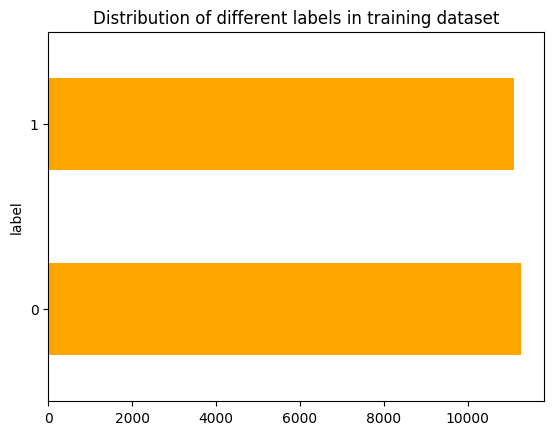

In [ ]:
print(train_df["label"].value_counts(sort = True, dropna = False).plot(kind = "barh", title = "Distribution of different labels in training dataset", color = "orange"))

In [ ]:
display(test_df)

,text,label
25632,knowi know know deal anymore know know say kno...,1
21143,noticed clothes either black white except one ...,0
18391,using sub diary day today great studying span...,0
3399,using much emojis make funnier thats,0
12692,dear reddit im gay soooo recently ive question...,0
...,...,...
22438,add pokmon go please need send gifts challenge...,0
21121,getting notification google classroom stresses...,0
10643,imagine using incognito mode deleting browser ...,0
13743,called redflag hotline night immensely helpful...,1


In [ ]:
print("The distribution of different labels in testing dataset:\n")
test_df["label"].value_counts(sort = True, dropna = False)

The distribution of different labels in testing dataset:



label
0    2875
1    2721
Name: count, dtype: int64

Axes(0.125,0.11;0.775x0.77)


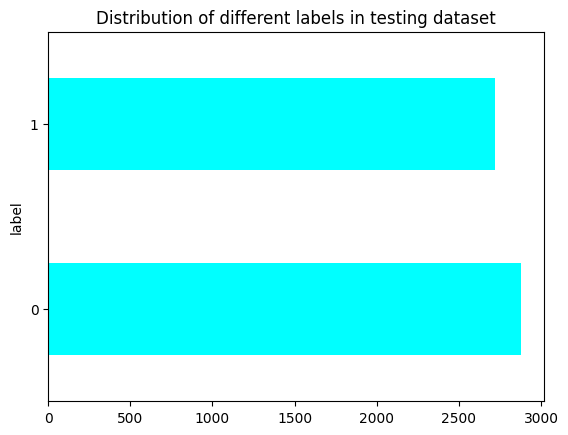

In [ ]:
print(test_df["label"].value_counts(sort = True, dropna = False).plot(kind = "barh", title = "Distribution of different labels in testing dataset", color = "cyan"))

Show the word frequency for each labels and plot it as graphs
(Training Dataset only)

In [ ]:
def prep_word_count(data):

    c = Counter()

    for sentence in data:
        words = tokenize(sentence)
        words = lowercase(words)
        words = remove_punctuations(words)
        words = remove_number(words)
        words = lemmatize(words)
        words = filter_stopwords(words)

        for word in words:
            c[word] += 1

    return c

Training dataset

In [ ]:
train_0 = train_df[train_df["label"] == 0]['text'].tolist()
train_1 = train_df[train_df["label"] == 1]['text'].tolist()

This takes around 5 minutes to finish

In [ ]:
train_0_word_freq = prep_word_count(train_0)
train_1_word_freq = prep_word_count(train_1)

In [ ]:
train_0_top_20 = Counter(dict(train_0_word_freq.most_common(20)))
train_1_top_20 = Counter(dict(train_1_word_freq.most_common(20)))

In [ ]:
print("Top 20 most frequently occured words (with label 0):")
print(train_0_top_20.items())
print("\n")
print("Top 20 most frequently occured words (with label 1):")
print(train_1_top_20.items())

Top 20 most frequently occured words (with label 0):
dict_items([('like', 5777), ('im', 5326), ('get', 5004), ('br', 4453), ('film', 3851), ('one', 3800), ('movie', 3592), ('make', 3576), ('go', 3485), ('know', 2921), ('say', 2783), ('see', 2740), ('time', 2697), ('want', 2691), ('filler', 2553), ('people', 2487), ('good', 2286), ('really', 2275), ('feel', 2138), ('well', 2085)])


Top 20 most frequently occured words (with label 1):
dict_items([('im', 22520), ('want', 14818), ('get', 13856), ('feel', 13362), ('go', 13031), ('like', 12712), ('know', 11091), ('life', 10611), ('time', 7813), ('ive', 7744), ('make', 7426), ('even', 7249), ('cant', 7095), ('think', 6999), ('year', 6740), ('would', 6726), ('people', 6694), ('one', 6688), ('try', 6448), ('friend', 6286)])


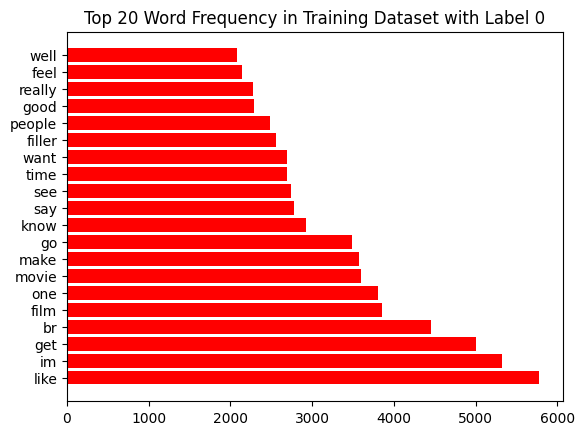

In [ ]:
plt.barh(list(train_0_top_20.keys()), train_0_top_20.values(), color = "red")
plt.title("Top 20 Word Frequency in Training Dataset with Label 0")
plt.show()

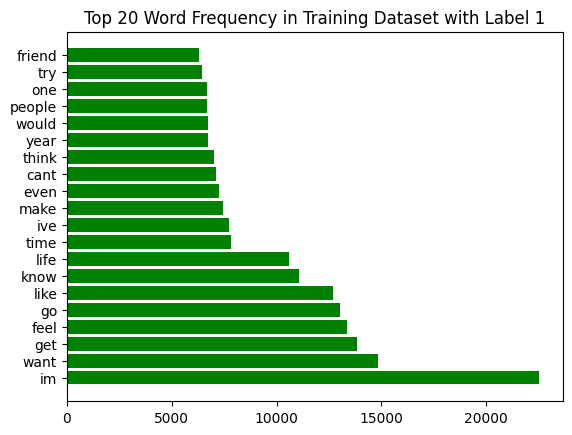

In [ ]:
plt.barh(list(train_1_top_20.keys()), train_1_top_20.values(), color = "green")
plt.title("Top 20 Word Frequency in Training Dataset with Label 1")
plt.show()

Testing dataset

In [ ]:
test_0 = test_df[test_df["label"] == 0]['text'].tolist()
test_1 = test_df[test_df["label"] == 1]['text'].tolist()

In [ ]:
test_0_word_freq = prep_word_count(test_0)
test_1_word_freq = prep_word_count(test_1)

In [ ]:
test_0_top_20 = Counter(dict(test_0_word_freq.most_common(20)))
test_1_top_20 = Counter(dict(test_1_word_freq.most_common(20)))

In [ ]:
print("Top 20 most frequently occured words (with label 0):")
print(test_0_top_20.items())
print("\n")
print("Top 20 most frequently occured words (with label 1):")
print(test_1_top_20.items())

Top 20 most frequently occured words (with label 0):
dict_items([('like', 1562), ('im', 1350), ('get', 1299), ('br', 1155), ('one', 1001), ('film', 997), ('movie', 935), ('make', 899), ('go', 859), ('know', 758), ('say', 748), ('time', 733), ('see', 714), ('filler', 668), ('people', 647), ('want', 642), ('day', 639), ('good', 585), ('really', 577), ('well', 539)])


Top 20 most frequently occured words (with label 1):
dict_items([('im', 5524), ('want', 3762), ('get', 3520), ('feel', 3464), ('like', 3265), ('go', 3244), ('know', 2767), ('life', 2747), ('ive', 2035), ('time', 2006), ('make', 1982), ('even', 1965), ('cant', 1846), ('friend', 1752), ('would', 1719), ('year', 1714), ('one', 1704), ('try', 1680), ('think', 1678), ('people', 1656)])


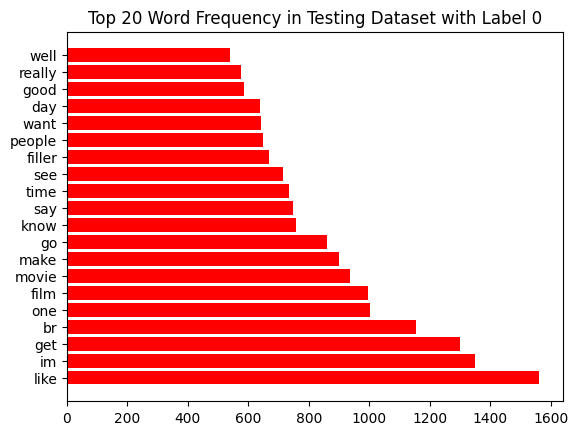

In [ ]:
plt.barh(list(test_0_top_20.keys()), test_0_top_20.values(), color = "red")
plt.title("Top 20 Word Frequency in Testing Dataset with Label 0")
plt.show()

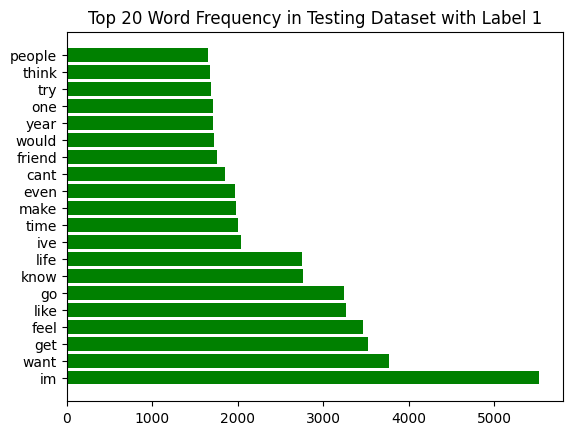

In [ ]:
plt.barh(list(test_1_top_20.keys()), test_1_top_20.values(), color = "green")
plt.title("Top 20 Word Frequency in Testing Dataset with Label 1")
plt.show()

Generate wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_wordcloud(words, width = 1000, height = 1000, min_font_size = 5, max_words = 250, background_color = "white"):

    wordcloud_stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width = width, height = height, min_font_size = min_font_size, max_words = max_words, background_color = background_color).generate(words)

    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Training dataset

In [ ]:
train_0_for_wordcloud = list(train_0_word_freq.elements())
train_0_for_wordcloud = " ".join(train_0_for_wordcloud)

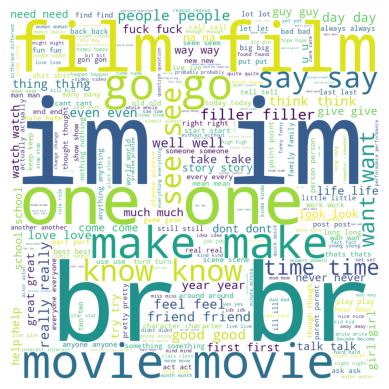

In [ ]:
generate_wordcloud(train_0_for_wordcloud)

In [ ]:
train_1_for_wordcloud = list(train_1_word_freq.elements())
train_1_for_wordcloud = " ".join(train_1_for_wordcloud)

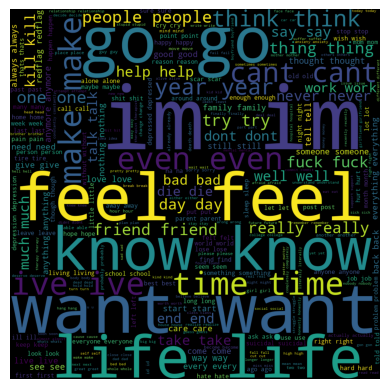

In [ ]:
generate_wordcloud(train_1_for_wordcloud, background_color = "black")

Testing dataset

In [ ]:
test_0_for_wordcloud = list(test_0_word_freq.elements())
test_0_for_wordcloud = " ".join(test_0_for_wordcloud)

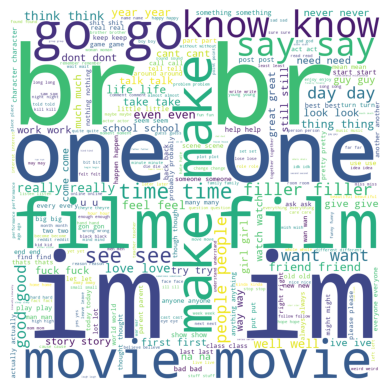

In [ ]:
generate_wordcloud(test_0_for_wordcloud)

In [ ]:
test_1_for_wordcloud = list(test_1_word_freq.elements())
test_1_for_wordcloud = " ".join(test_1_for_wordcloud)

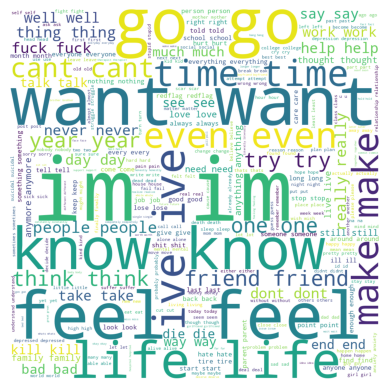

In [ ]:
generate_wordcloud(test_1_for_wordcloud)

# **Data Pre-Processing for Naive Bayes**

In [ ]:
X_train_for_first_two, X_test_for_first_two, y_train_for_first_two, y_test_for_first_two = train_test_split(df['text'], df['label'], test_size = 0.2, random_state = 4211)

vectorizer = CountVectorizer()
X_count_vector_train = vectorizer.fit_transform(X_train_for_first_two)
X_count_vector_test = vectorizer.transform(X_test_for_first_two)

print(X_count_vector_test)

  (0, 2633)	1
  (0, 13199)	1
  (0, 14446)	1
  (0, 22837)	1
  (0, 31090)	9
  (0, 31103)	1
  (0, 44255)	1
  (0, 48264)	1
  (0, 55762)	1
  (0, 60717)	2
  (1, 5157)	1
  (1, 5827)	2
  (1, 8482)	1
  (1, 9869)	1
  (1, 16936)	1
  (1, 18505)	1
  (1, 32947)	1
  (1, 38415)	1
  (1, 39296)	2
  (1, 41985)	1
  (1, 57806)	2
  (1, 61584)	2
  (2, 4180)	1
  (2, 6601)	1
  (2, 7242)	1
  :	:
  (5595, 42140)	1
  (5595, 44426)	1
  (5595, 44481)	1
  (5595, 45221)	3
  (5595, 45278)	1
  (5595, 45564)	1
  (5595, 48264)	1
  (5595, 48355)	1
  (5595, 48502)	1
  (5595, 49025)	1
  (5595, 49286)	1
  (5595, 49666)	1
  (5595, 50455)	2
  (5595, 52701)	1
  (5595, 53422)	1
  (5595, 53863)	2
  (5595, 54776)	1
  (5595, 55146)	1
  (5595, 55805)	1
  (5595, 56024)	2
  (5595, 56332)	2
  (5595, 58883)	1
  (5595, 60717)	1
  (5595, 62230)	1
  (5595, 62838)	1


# **Naive Bayes**

Naive Bayes Accuracy without smoothing:  0.8518584703359543
Precision: 0.782051282051282
Recall: 0.9639838294744579
F1 Score: 0.8635390946502058


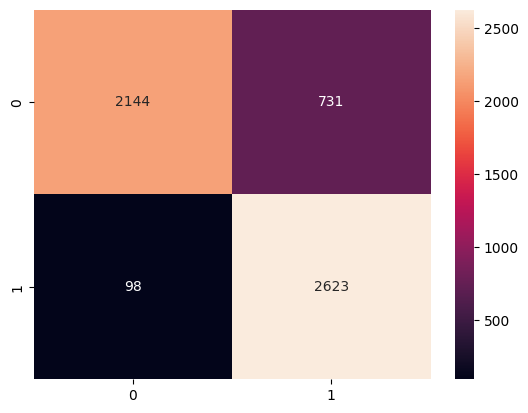

In [ ]:
# Naive Bayes by CountVectorizer
starting_time = time.time()

nb_count_model = MultinomialNB(alpha = 0).fit(X_count_vector_train, y_train_for_first_two)
print("Naive Bayes Accuracy without smoothing: ", accuracy_score(y_test_for_first_two, nb_count_model.predict(X_count_vector_test)))
nb_conf_mat = confusion_matrix(y_true = y_test_for_first_two, y_pred = nb_count_model.predict(X_count_vector_test))
visualize_confusion_matrix(nb_conf_mat)
print("Precision:", precision_score(y_test_for_first_two, nb_count_model.predict(X_count_vector_test)))
print("Recall:", recall_score(y_test_for_first_two, nb_count_model.predict(X_count_vector_test)))
print("F1 Score:", f1_score(y_test_for_first_two, nb_count_model.predict(X_count_vector_test)))

Naive Bayes Accuracy with smoothing:  0.8429235167977126
Precision: 0.7612024957458877
Recall: 0.9864020580668872
F1 Score: 0.859292460380983


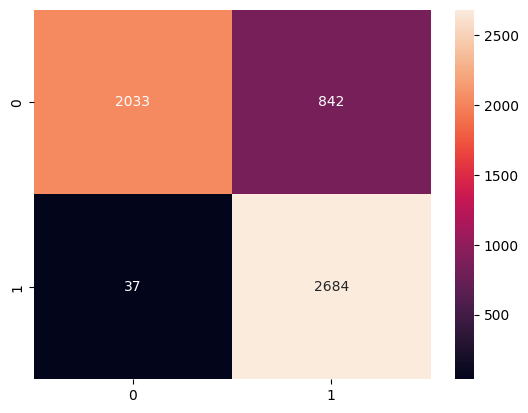

In [ ]:
# Naive Bayes by CountVectorizer
nb_count_model = MultinomialNB().fit(X_count_vector_train, y_train_for_first_two)
print("Naive Bayes Accuracy with smoothing: ", accuracy_score(y_test_for_first_two, nb_count_model.predict(X_count_vector_test)))
nb_conf_mat = confusion_matrix(y_true = y_test_for_first_two, y_pred = nb_count_model.predict(X_count_vector_test))
visualize_confusion_matrix(nb_conf_mat)
print("Precision:", precision_score(y_test_for_first_two, nb_count_model.predict(X_count_vector_test)))
print("Recall:", recall_score(y_test_for_first_two, nb_count_model.predict(X_count_vector_test)))
print("F1 Score:", f1_score(y_test_for_first_two, nb_count_model.predict(X_count_vector_test)))

ending_time = time.time()

In [ ]:
print("The time usage in the Naive Bayes is ", ending_time - starting_time, " seconds")

The time usage in the Naive Bayes is  0.458526611328125  seconds


# **Data Pre-Processing For below model**

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (17904,)
Shape of X_val: (4477,)
Shape of X_test: (5596,)
Shape of y_train: (17904,)
Shape of y_val: (4477,)
Shape of y_test: (5596,)


In [ ]:
# Preprocessing the data
starting_time = time.time()
X_train = [n_gram(filter_stopwords(lemmatize(remove_punctuations(remove_number(tokenize(lowercase(x))))))) for x in X_train]
X_val = [n_gram(filter_stopwords(lemmatize(remove_punctuations(remove_number(tokenize(lowercase(x))))))) for x in X_val]
ending_time = time.time()
print("Time usage = ", ending_time - starting_time)

Time usage =  256.51410698890686


In [ ]:
# For evaluating the first 10 stuff in training data
for i in range(10):
    print(X_train[i])

print(y_train[:10])

['lmao', 'im', 'still', 'contemplate', 'whether', 'confess', 'feel', 'lucky', 'bastard', 'im', 'crush', 'sub', 'havent', 'even', 'see', 'face', 'fuck', 'theyre', 'cute', 'attractive', 'skme', 'reason', 'id', 'literally', 'lose', 'comment', 'post', 'theyre', 'kinda', 'active', 'afaik']
['paini', 'young', 'everyday', 'wake', 'terrible', 'headache', 'go', 'doctor', 'year', 'really', 'long', 'remember', 'gotten', 'point', 'want', 'live', 'anymore', 'really', 'lot', 'medication', 'right', 'help', 'day', 'hide', 'think', 'fake', 'go', 'kill', 'want', 'live', 'thing', 'keep', 'alive', 'family', 'feel', 'well', 'let', 'think', 'know', 'bring', 'deny', 'stupid', 'post', 'want', 'get', 'trouble']
['first', 'saw', 'show', 'around', 'easter', 'time', 'think', 'much', 'bought', 'dvd', 'last', 'summer', 'start', 'get', 'michael', 'jackson', 'like', 'music', 'enjoy', 'old', 'good', 'film', 'classic', 'film', 'like', 'sound', 'music', 'west', 'side', 'story', 'wizard', 'oz', 'etc', 'michael', 'jackson

# **One-Hot MLP Model**

# One-Hot Length = 100

In [ ]:
# Build the corpus for the one-hot vector with max length = 100
corpus_onehot = corpus([token for sublist in (X_train + X_val) for token in sublist], max_size = 100)

# Prepare one-hot vector
X_train_one_hot_vector = [onehot_vector(x, corpus_onehot) for x in X_train]
X_val_one_hot_vector = [onehot_vector(x, corpus_onehot) for x in X_val]

y_train_one_hot = pd.get_dummies(y_train)
y_val_one_hot = pd.get_dummies(y_val)

print("X_train one-hot with the first 10 stuff")
print(X_train_one_hot_vector[ : 10])

print("y_train one-hot with the first 10 stuff")
print(y_train_one_hot[ : 10])

X_train one-hot with the first 10 stuff
[array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# This function return the model of one-hot
def get_onehot_model(input_shape):

    model = Sequential()
    model.add(Flatten(input_shape = input_shape))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='relu'))

    model.add(Dense(2, activation='softmax'))

    return model

In [ ]:
# Get the details about the model
get_onehot_model(input_shape = np.array(X_train_one_hot_vector).shape[1:]).summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1000)              0         
                                                                 
 dense_3 (Dense)             (None, 16)                16016     
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_6 (Dense)             (None, 4)                

In [ ]:
# The training of the onehot model
onehot100_model = get_onehot_model(input_shape = np.array(X_train_one_hot_vector).shape[1:])
onehot100_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
onehot100_history = onehot100_model.fit(np.array(X_train_one_hot_vector), np.array(y_train_one_hot), batch_size = 64, epochs = 10, validation_data = (np.array(X_val_one_hot_vector), np.array(y_val_one_hot)))

Epoch 1/10
280/280 [==============================] - 2s 4ms/step - loss: 0.6355 - accuracy: 0.6711 - val_loss: 0.4701 - val_accuracy: 0.8403
Epoch 2/10
280/280 [==============================] - 1s 4ms/step - loss: 0.4805 - accuracy: 0.7896 - val_loss: 0.3804 - val_accuracy: 0.8608
Epoch 3/10
280/280 [==============================] - 1s 3ms/step - loss: 0.4344 - accuracy: 0.8117 - val_loss: 0.3652 - val_accuracy: 0.8553
Epoch 4/10
280/280 [==============================] - 1s 3ms/step - loss: 0.4171 - accuracy: 0.8187 - val_loss: 0.3603 - val_accuracy: 0.8611
Epoch 5/10
280/280 [==============================] - 1s 3ms/step - loss: 0.3986 - accuracy: 0.8233 - val_loss: 0.3566 - val_accuracy: 0.8642
Epoch 6/10
280/280 [==============================] - 1s 3ms/step - loss: 0.3973 - accuracy: 0.8262 - val_loss: 0.3546 - val_accuracy: 0.8635
Epoch 7/10
280/280 [==============================] - 1s 3ms/step - loss: 0.3960 - accuracy: 0.8273 - val_loss: 0.3544 - val_accuracy: 0.8644
Epoch 

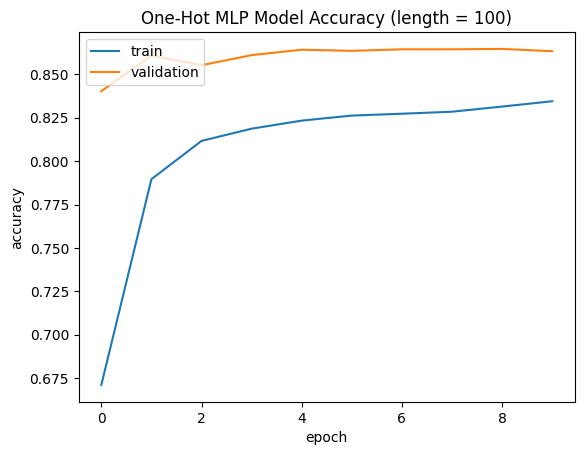

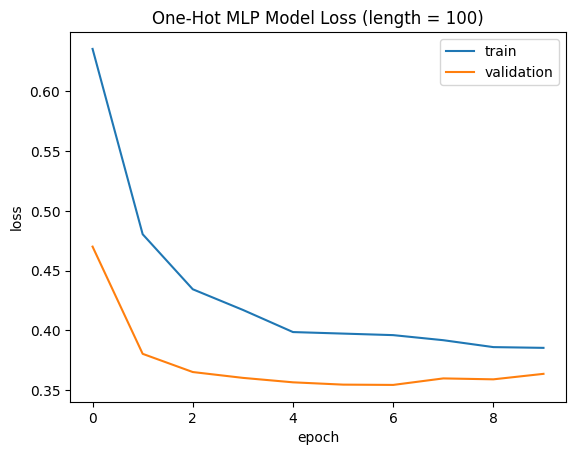

In [ ]:
plot_accuracy("One-Hot MLP Model Accuracy (length = 100)", onehot100_history)
plot_loss("One-Hot MLP Model Loss (length = 100)", onehot100_history)

In [ ]:
# Performance evaluation in testing set
X_test_one_hot = [n_gram(filter_stopwords(lemmatize(remove_punctuations(remove_number(tokenize(lowercase(x))))))) for x in test_df['text']]
X_test_one_hot = [onehot_vector(x, corpus_onehot) for x in X_test_one_hot]
y_test_one_hot = test_df['label']

In [ ]:
# Accuracy Performance
y_predict_class = np.argmax(onehot100_model.predict(np.array(X_test_one_hot)), axis = 1)
accuracy = accuracy_score(y_test_one_hot, y_predict_class)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

175/175 [==============================] - 0s 1ms/step
Test Accuracy: 86.88%


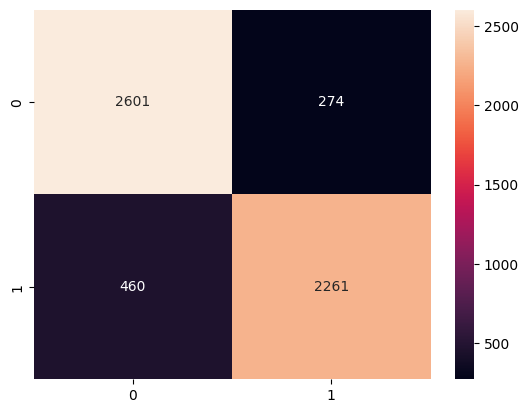

In [ ]:
# COnfusion Matrix
onehot100_conf_mat = confusion_matrix(y_true = y_test_one_hot, y_pred = y_predict_class)
visualize_confusion_matrix(onehot100_conf_mat)

In [ ]:
# This function return the model of one-hot
# This is a more complex model for analyzing the length of encoding
def get_onehot_model(input_shape):

    model = Sequential()
    model.add(Flatten(input_shape = input_shape))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(16, activation='relu'))

    model.add(Dense(2, activation='softmax'))

    return model

In [ ]:
# Get the details about the model
get_onehot_model(input_shape = np.array(X_train_one_hot_vector).shape[1:]).summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1000)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               256256    
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)              

In [ ]:
# The training of the onehot model
onehot100_model_complex = get_onehot_model(input_shape = np.array(X_train_one_hot_vector).shape[1:])
onehot100_model_complex.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
onehot100_history_complex = onehot100_model_complex.fit(np.array(X_train_one_hot_vector), np.array(y_train_one_hot), batch_size = 64, epochs = 10, validation_data = (np.array(X_val_one_hot_vector), np.array(y_val_one_hot)))

Epoch 1/10
280/280 [==============================] - 12s 20ms/step - loss: 0.4679 - accuracy: 0.7908 - val_loss: 0.3488 - val_accuracy: 0.8530
Epoch 2/10
280/280 [==============================] - 4s 16ms/step - loss: 0.3495 - accuracy: 0.8532 - val_loss: 0.3362 - val_accuracy: 0.8620
Epoch 3/10
280/280 [==============================] - 6s 22ms/step - loss: 0.3309 - accuracy: 0.8633 - val_loss: 0.3353 - val_accuracy: 0.8673
Epoch 4/10
280/280 [==============================] - 4s 16ms/step - loss: 0.3150 - accuracy: 0.8698 - val_loss: 0.3741 - val_accuracy: 0.8646
Epoch 5/10
280/280 [==============================] - 4s 15ms/step - loss: 0.2973 - accuracy: 0.8782 - val_loss: 0.3335 - val_accuracy: 0.8633
Epoch 6/10
280/280 [==============================] - 7s 23ms/step - loss: 0.2761 - accuracy: 0.8888 - val_loss: 0.3467 - val_accuracy: 0.8611
Epoch 7/10
280/280 [==============================] - 5s 17ms/step - loss: 0.2530 - accuracy: 0.9004 - val_loss: 0.3688 - val_accuracy: 0.854

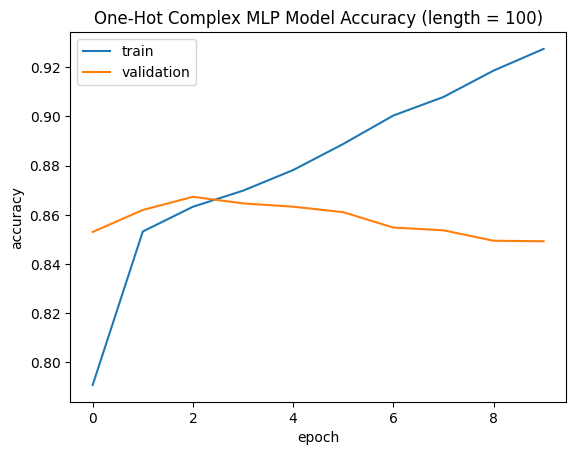

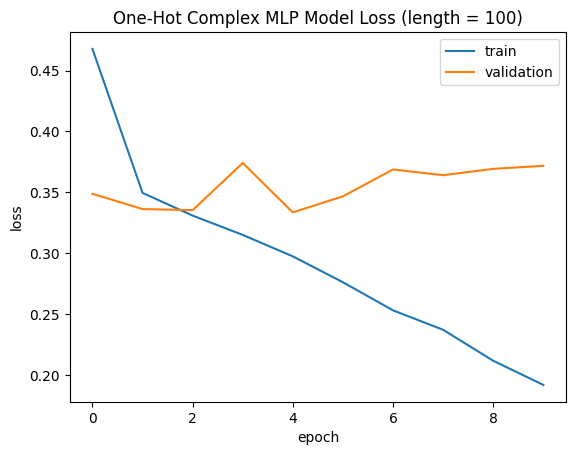

In [ ]:
plot_accuracy("One-Hot Complex MLP Model Accuracy (length = 100)", onehot100_history_complex)
plot_loss("One-Hot Complex MLP Model Loss (length = 100)", onehot100_history_complex)

In [ ]:
# Accuracy performance
y_predict_class = np.argmax(onehot100_model_complex.predict(np.array(X_test_one_hot)), axis = 1)
accuracy = accuracy_score(y_test_one_hot, y_predict_class)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

175/175 [==============================] - 1s 4ms/step
Test Accuracy: 85.61%


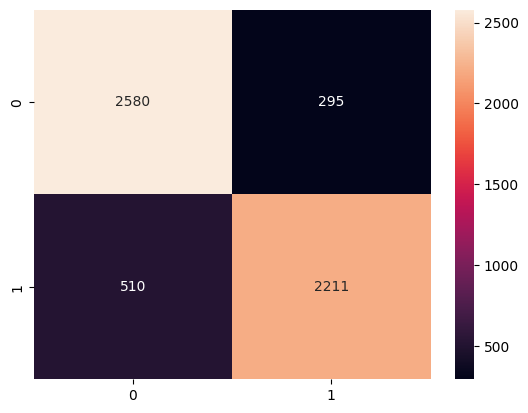

In [ ]:
# Confusion Matrix
onehot100_conf_mat_complex = confusion_matrix(y_true = y_test_one_hot, y_pred = y_predict_class)
visualize_confusion_matrix(onehot100_conf_mat_complex)

# One-Hot Length = 1000

In [ ]:
# Build the corpus for the one-hot vector with max length = 1000
corpus_onehot = corpus([token for sublist in (X_train + X_val) for token in sublist], max_size = 1000)

# Prepare one-hot vector
X_train_one_hot_vector = [onehot_vector(x, corpus_onehot) for x in X_train]
X_val_one_hot_vector = [onehot_vector(x, corpus_onehot) for x in X_val]

y_train_one_hot = pd.get_dummies(y_train)
y_val_one_hot = pd.get_dummies(y_val)

In [ ]:
# This function return the model of one-hot
def get_onehot_model(input_shape):

    model = Sequential()
    model.add(Flatten(input_shape = input_shape))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='relu'))

    model.add(Dense(2, activation='softmax'))

    return model

In [ ]:
# Get the details about the model
get_onehot_model(input_shape = np.array(X_train_one_hot_vector).shape[1:]).summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 1000)              0         
                                                                 
 dense_19 (Dense)            (None, 16)                16016     
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_20 (Dense)            (None, 8)                 136       
                                                                 
 dense_21 (Dense)            (None, 8)                 72        
                                                                 
 dropout_9 (Dropout)         (None, 8)                 0         
                                                                 
 dense_22 (Dense)            (None, 4)                

In [ ]:
# The training of the onehot model
onehot1000_model = get_onehot_model(input_shape = np.array(X_train_one_hot_vector).shape[1:])
onehot1000_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
onehot1000_history = onehot1000_model.fit(np.array(X_train_one_hot_vector), np.array(y_train_one_hot), batch_size = 64, epochs = 3, validation_data = (np.array(X_val_one_hot_vector), np.array(y_val_one_hot)))

Epoch 1/3
280/280 [==============================] - 3s 6ms/step - loss: 0.6192 - accuracy: 0.6711 - val_loss: 0.3936 - val_accuracy: 0.8912
Epoch 2/3
280/280 [==============================] - 1s 3ms/step - loss: 0.4092 - accuracy: 0.8629 - val_loss: 0.2877 - val_accuracy: 0.8966
Epoch 3/3
280/280 [==============================] - 1s 3ms/step - loss: 0.3275 - accuracy: 0.8882 - val_loss: 0.2641 - val_accuracy: 0.8973


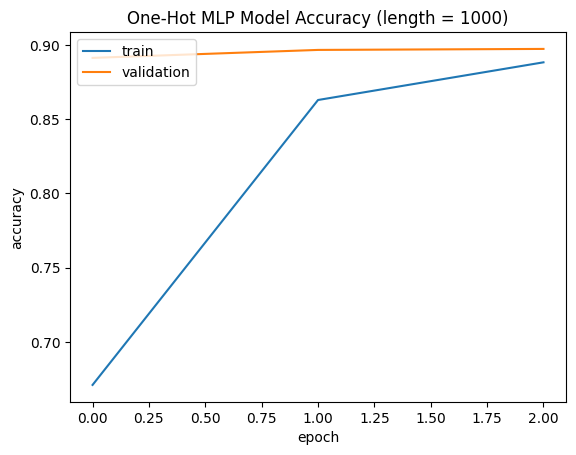

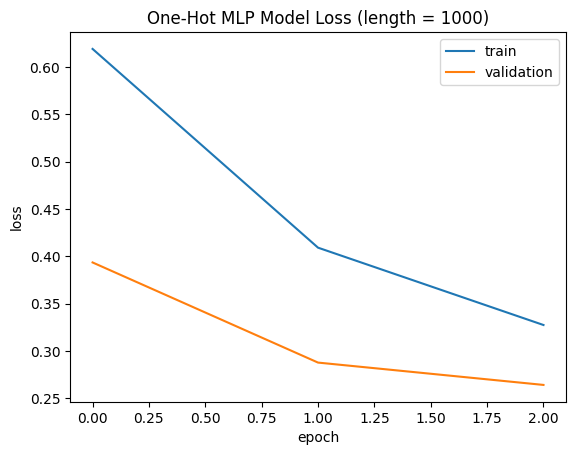

In [ ]:
plot_accuracy("One-Hot MLP Model Accuracy (length = 1000)", onehot1000_history)
plot_loss("One-Hot MLP Model Loss (length = 1000)", onehot1000_history)

In [ ]:
# Performance evaluation in testing set
X_test_one_hot = [n_gram(filter_stopwords(lemmatize(remove_punctuations(remove_number(tokenize(lowercase(x))))))) for x in test_df['text']]
X_test_one_hot = [onehot_vector(x, corpus_onehot) for x in X_test_one_hot]
y_test_one_hot = test_df['label']

In [ ]:
# Accuracy performance
y_predict_class = np.argmax(onehot1000_model.predict(np.array(X_test_one_hot)), axis = 1)
accuracy = accuracy_score(y_test_one_hot, y_predict_class)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

175/175 [==============================] - 0s 2ms/step
Test Accuracy: 91.07%


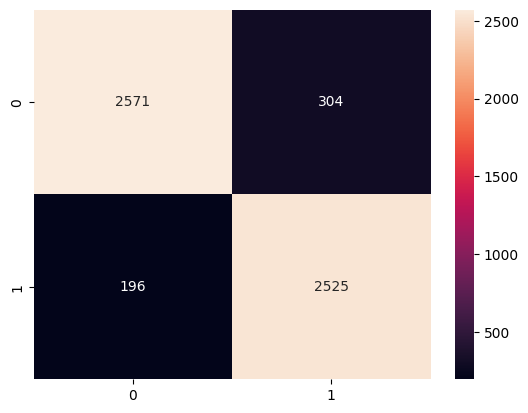

In [ ]:
# Confusion Matrix
onehot1000_conf_mat = confusion_matrix(y_true = y_test_one_hot, y_pred = y_predict_class)
visualize_confusion_matrix(onehot1000_conf_mat)

# **Index RNN Model**

In [ ]:
# Build the corpus for the index vector
corpus_index = corpus([token for sublist in (X_train + X_val) for token in sublist])

# Prepare index vactor
X_train_index_vector = [index_vector(x, corpus_index, length = 100) for x in X_train]
X_val_index_vector = [index_vector(x, corpus_index, length = 100) for x in X_val]

y_train_index_vector = pd.get_dummies(y_train)
y_val_index_vector = pd.get_dummies(y_val)

In [ ]:
# Checking the output
count = 0
for key, value in corpus_index.items():
    print(key, value)
    count += 1
    if count == 20:
        break

<pad> 0
<unk> 1
im 2
get 3
like 4
want 5
go 6
feel 7
know 8
life 9
make 10
time 11
one 12
people 13
even 14
think 15
ive 16
would 17
year 18
friend 19


In [ ]:
# Checking the output
for i in range(10):
    print(X_train_index_vector[i])

[ 1409     2    50  1130   671  2137     7   995  3219     2   433   666
   610    14    28   246    26   290   897  1076 22721   106   157   240
    93   356    87   290   407  1812 22722     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
[5999  230  343  245  495 1903    6  423   18   21   91  192  448   81
    5   59   54   21   88  480   70   30   25  977   15  676    6   42
    5   59   22   74  242   57    7   27  117   15    8  437 1446  233
   87    5    3  664    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0

In [ ]:
# This function return the model of index
def get_index_model(corpus_index):

    model = Sequential()
    model.add(Embedding(input_dim = len(corpus_index), output_dim = 32))
    model.add(LSTM(16, return_sequences = True))
    model.add(Dropout(0.5))
    model.add(LSTM(8))
    model.add(Dense(2, activation='softmax'))

    return model

In [ ]:
# Get the details about the model
get_index_model(corpus_index).summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          1729696   
                                                                 
 lstm (LSTM)                 (None, None, 16)          3136      
                                                                 
 dropout_1 (Dropout)         (None, None, 16)          0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 1733650 (6.61 MB)
Trainable params: 1733650 (6.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# The training of the index model
index_model = get_index_model(corpus_index)
index_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_history = index_model.fit(np.array(X_train_index_vector), np.array(y_train_index_vector), batch_size = 64, epochs = 3, validation_data = (np.array(X_val_index_vector), np.array(y_val_index_vector)))

Epoch 1/3
280/280 [==============================] - 35s 104ms/step - loss: 0.5369 - accuracy: 0.7620 - val_loss: 0.5072 - val_accuracy: 0.8340
Epoch 2/3
280/280 [==============================] - 27s 96ms/step - loss: 0.4474 - accuracy: 0.8348 - val_loss: 0.5790 - val_accuracy: 0.7114
Epoch 3/3
280/280 [==============================] - 27s 96ms/step - loss: 0.3894 - accuracy: 0.8577 - val_loss: 0.3635 - val_accuracy: 0.8754


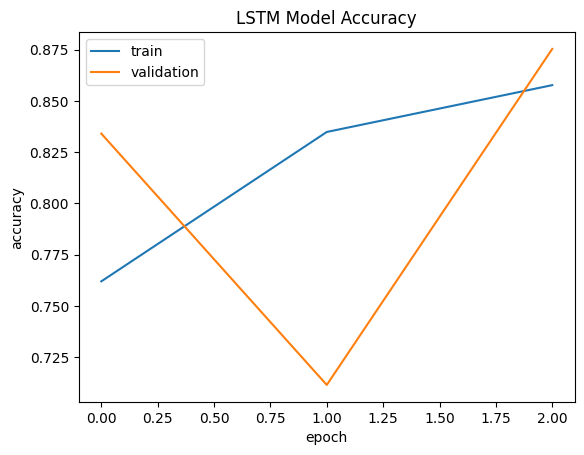

In [ ]:
plot_accuracy("LSTM Model Accuracy", lstm_history)

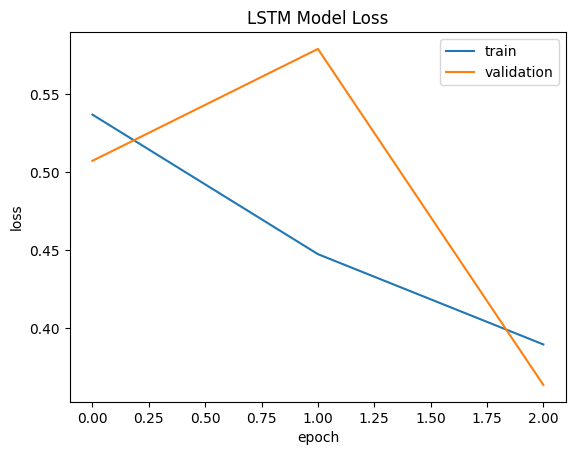

In [ ]:
plot_loss("LSTM Model Loss", lstm_history)

In [ ]:
# Performance evaluation in testing set
X_test_index = [n_gram(filter_stopwords(lemmatize(remove_punctuations(remove_number(tokenize(lowercase(x))))))) for x in test_df['text']]
X_test_index = [index_vector(x, corpus_index, length = 100) for x in X_test_index]
y_test_index = test_df['label']

In [ ]:
# Accuracy performance
y_predict_class = np.argmax(index_model.predict(np.array(X_test_index)), axis = 1)
accuracy = accuracy_score(y_test_index, y_predict_class)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

175/175 [==============================] - 3s 15ms/step
Test Accuracy: 88.46%


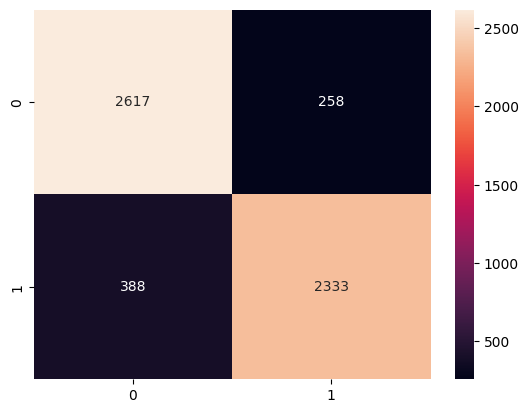

In [ ]:
# Confusion Matrix
index_conf_mat = confusion_matrix(y_true = y_test_index, y_pred = y_predict_class)
visualize_confusion_matrix(index_conf_mat)

# **CNN Model**

In [ ]:
# Build the corpus for the index vector
corpus_cnn = corpus([token for sublist in (X_train + X_val) for token in sublist])

# Prepare index vactor
X_train_cnn_vector = [index_vector(x, corpus_cnn, length = 100) for x in X_train]
X_val_cnn_vector = [index_vector(x, corpus_cnn, length = 100) for x in X_val]

y_train_cnn_vector = pd.get_dummies(y_train)
y_val_cnn_vector = pd.get_dummies(y_val)

In [ ]:
# This function return the model of CNN
def get_cnn_model(corpus_cnn):

    model = Sequential()
    model.add(Embedding(input_dim = len(corpus_cnn), output_dim = 32, input_length = 100))
    model.add(Conv1D(filters = 16, kernel_size = 4, padding = 'same', activation = 'relu'))
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Dropout(0.5))
    model.add(Conv1D(filters = 16, kernel_size = 4, padding = 'same', activation = 'relu'))
    model.add(MaxPooling1D(pool_size = 2))
    model.add(Flatten())
    model.add(Dense(4, activation = 'relu'))
    model.add(Dense(2, activation = 'softmax'))

    return model

In [ ]:
# Get the details about the model
get_cnn_model(corpus_cnn).summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           1729696   
                                                                 
 conv1d (Conv1D)             (None, 100, 16)           2064      
                                                                 
 max_pooling1d (MaxPooling1  (None, 50, 16)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 50, 16)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 50, 16)            1040      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 25, 16)            0         
 g1D)                                                   

In [ ]:
# The training of the index model
cnn_model = get_cnn_model(corpus_cnn)
cnn_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
cnn_history = cnn_model.fit(np.array(X_train_cnn_vector), np.array(y_train_cnn_vector), batch_size = 64, epochs = 3, validation_data = (np.array(X_val_cnn_vector), np.array(y_val_cnn_vector)))

Epoch 1/3
280/280 [==============================] - 12s 38ms/step - loss: 0.4465 - accuracy: 0.8040 - val_loss: 0.2579 - val_accuracy: 0.9022
Epoch 2/3
280/280 [==============================] - 9s 33ms/step - loss: 0.1900 - accuracy: 0.9311 - val_loss: 0.2159 - val_accuracy: 0.9153
Epoch 3/3
280/280 [==============================] - 11s 40ms/step - loss: 0.1181 - accuracy: 0.9587 - val_loss: 0.2297 - val_accuracy: 0.9147


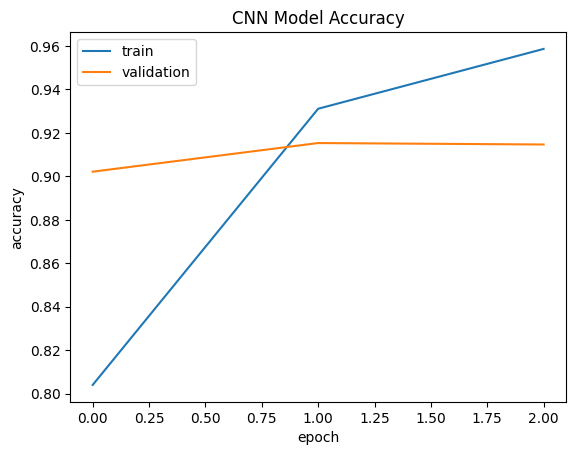

In [ ]:
plot_accuracy("CNN Model Accuracy", cnn_history)

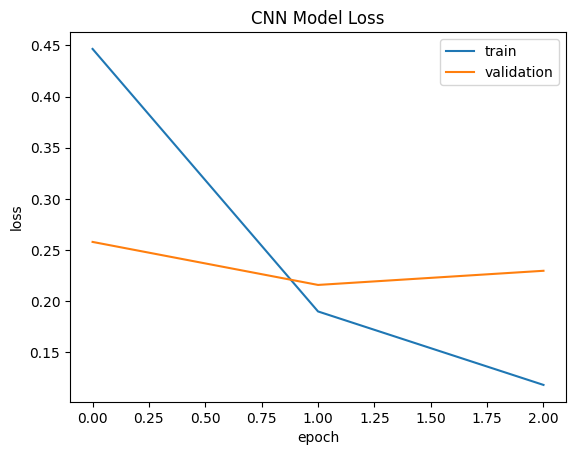

In [ ]:
plot_loss("CNN Model Loss", cnn_history)

In [ ]:
# Performance evaluation in testing set
X_test_cnn = [n_gram(filter_stopwords(lemmatize(remove_punctuations(remove_number(tokenize(lowercase(x))))))) for x in test_df['text']]
X_test_cnn = [index_vector(x, corpus_cnn, length = 100) for x in X_test_cnn]
y_test_cnn = test_df['label']

In [ ]:
# Accuracy performance
y_predict_class = np.argmax(cnn_model.predict(np.array(X_test_cnn)), axis = 1)
accuracy = accuracy_score(y_test_cnn, y_predict_class)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

175/175 [==============================] - 1s 5ms/step
Test Accuracy: 91.53%


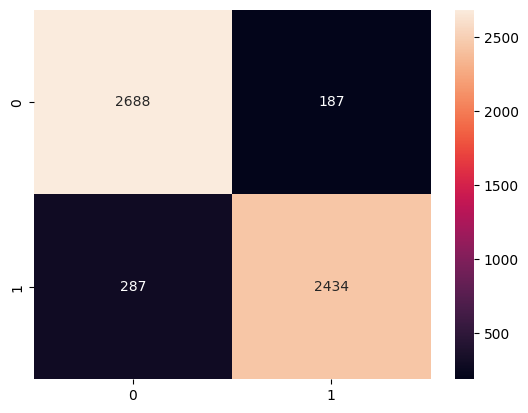

In [ ]:
# Confusion Matrix
cnn_conf_mat = confusion_matrix(y_true = y_test_cnn, y_pred = y_predict_class)
visualize_confusion_matrix(cnn_conf_mat)

# **DistilBERT**

research paper: https://arxiv.org/pdf/1910.01108.pdf

Explicitly specify we need to use transformers package from Hugging Face with version 4.31.0 (which is more stable)

In [ ]:
!pip install transformers==4.31.0

import necessary libraries and packages

In [ ]:
import os
from tqdm import tqdm
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from transformers import DistilBertTokenizer, TFDistilBertModel
from tokenizers import BertWordPieceTokenizer

initialize the seed as 4211

In [ ]:
SEED = 4211

read the dataset

In [ ]:
df = pd.read_csv("/content/shared/input/mental_health.csv")

Split the dataset to train, valiation and test dataset

In [ ]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = 0.2, random_state = 4211)

# Splitting the data into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 4211)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = 0.25, random_state = 4211, shuffle = True)

for encoding the words with the DistilBERT tokenizers

and return the encoded words (in a numy array)

In [ ]:
def DistilBERT_encoding(sentences, tokenizer, window_size = 1, max_length = 128):

    tokenizer.enable_truncation(max_length = max_length)
    tokenizer.enable_padding(length = max_length)

    ID = []

    for i in tqdm(range(0, len(sentences), window_size)):
        window = sentences[i : i + window_size].tolist()
        encoding = tokenizer.encode_batch(window)
        ID.extend([encode_word.ids for encode_word in encoding])

    return np.array(ID)

configuration of number of epoches, batch size and max length

In [ ]:
AUTO = tf.data.experimental.AUTOTUNE
EPOCHS = 3
BATCH_SIZE = 64
MAX_LEN = 128

download the vocbulary text file for the tokenizer from Hugging Face

In [ ]:
!wget https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt

--2024-04-23 08:06:18--  https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.121.216, 54.231.236.24, 52.216.214.80, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.121.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 231508 (226K) [text/plain]
Saving to: ‘bert-base-uncased-vocab.txt’

bert-base-uncased-v 100%[===================>] 226.08K  --.-KB/s    in 0.08s   

2024-04-23 08:06:19 (2.77 MB/s) - ‘bert-base-uncased-vocab.txt’ saved [231508/231508]



configure the tokenizer

In [ ]:
DistilBERT_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')

BertWP_tokenizer = BertWordPieceTokenizer('bert-base-uncased-vocab.txt', lowercase = True)

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

In [ ]:
DistilBERT_tokenizer

DistilBertTokenizer(name_or_path='distilbert-base-multilingual-cased', vocab_size=119547, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [ ]:
BertWP_tokenizer

Tokenizer(vocabulary_size=30522, model=BertWordPiece, unk_token=[UNK], sep_token=[SEP], cls_token=[CLS], pad_token=[PAD], mask_token=[MASK], clean_text=True, handle_chinese_chars=True, strip_accents=None, lowercase=True, wordpieces_prefix=##)

encode the train, validation and test dataset

In [ ]:
x_train = DistilBERT_encoding(X_train.astype(str), BertWP_tokenizer)
x_valid = DistilBERT_encoding(X_valid.astype(str), BertWP_tokenizer)
x_test = DistilBERT_encoding(X_test.astype(str), BertWP_tokenizer)

100%|██████████| 5596/5596 [00:02<00:00, 1931.97it/s]


In [ ]:
# x_train = fast_encode(train1.comment_text.astype(str), fast_tokenizer, maxlen=MAX_LEN)
# x_valid = fast_encode(valid.comment_text.astype(str), fast_tokenizer, maxlen=MAX_LEN)
# x_test = fast_encode(test.content.astype(str), fast_tokenizer, maxlen=MAX_LEN)

# y_train = train1.toxic.values
# y_valid = valid.toxic.values

change the train, validate and test dataset to td.data.Dataset

In [ ]:
train_dataset = (tf.data.Dataset
                 .from_tensor_slices((x_train, y_train.astype(int)))
                 .shuffle(SEED)
                 .batch(BATCH_SIZE)
                 .prefetch(AUTO))

valid_dataset = (tf.data.Dataset
                 .from_tensor_slices((x_valid, y_valid.astype(int)))
                 .shuffle(SEED)
                 .batch(BATCH_SIZE)
                 .prefetch(AUTO))

test_dataset = (tf.data.Dataset
                 .from_tensor_slices((x_test))
                 .batch(BATCH_SIZE))

change the test labels to int data type

In [ ]:
y_test = y_test.astype(int)

build the DistilBERT model

In [ ]:
def build_DistilBERT(transformer_layer, max_len = MAX_LEN):

    input = Input(shape = (max_len,), dtype = tf.int64, name = "input")
    trans_out = transformer_layer(input)[0]
    classify_token = trans_out[:, 0, :]
    output = Dense(1, activation = "sigmoid", name = "output")(classify_token)

    model = Model(inputs = input, outputs = output, name = "DistilBERT")
    model.compile(Adam(learning_rate = 1e-5), loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

get the pretrained DistilBERT model

In [ ]:
# from tensorflow.distribute.Strategy import scope

# with strategy.scope():
transformer_layer = TFDistilBertModel.from_pretrained('distilbert-base-multilingual-cased')

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


check the summary of the DistilBERT model

In [ ]:
DistilBERT_model = build_DistilBERT(transformer_layer)

DistilBERT_model.summary()

Model: "DistilBERT"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 128)]             0         
                                                                 
 tf_distil_bert_model (TFDi  TFBaseModelOutput(last_   134734080 
 stilBertModel)              hidden_state=(None, 128             
                             , 768),                             
                              hidden_states=None, at             
                             tentions=None)                      
                                                                 
 tf.__operators__.getitem (  (None, 768)               0         
 SlicingOpLambda)                                                
                                                                 
 output (Dense)              (None, 1)                 769       
                                                        

271 seconds for epoch 1

250 seconds for epoch 2

250 seconds for epoch 3

train for 3 epoches

In [ ]:
DistilBERT_history = DistilBERT_model.fit(x = train_dataset, validation_data = valid_dataset, epochs = EPOCHS, verbose = 1)

Epoch 1/3
280/280 [==============================] - 254s 817ms/step - loss: 0.4112 - accuracy: 0.8097 - val_loss: 0.2792 - val_accuracy: 0.8897
Epoch 2/3
280/280 [==============================] - 233s 833ms/step - loss: 0.2460 - accuracy: 0.9024 - val_loss: 0.2237 - val_accuracy: 0.9176
Epoch 3/3
280/280 [==============================] - 236s 843ms/step - loss: 0.1844 - accuracy: 0.9271 - val_loss: 0.2134 - val_accuracy: 0.9180


plotting DistilBERT model accuracy

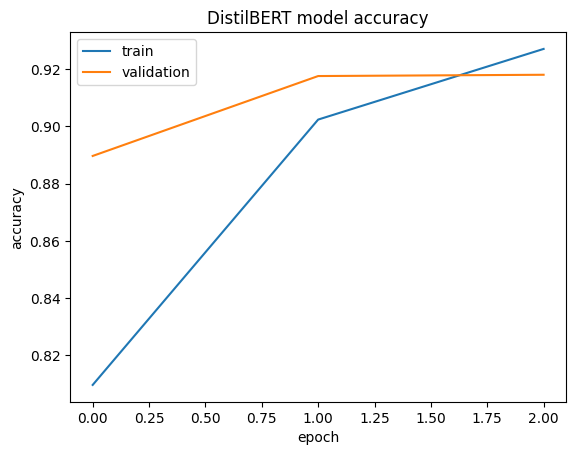

In [ ]:
plot_accuracy("DistilBERT model accuracy", DistilBERT_history)

plotting DistilBERT model loss

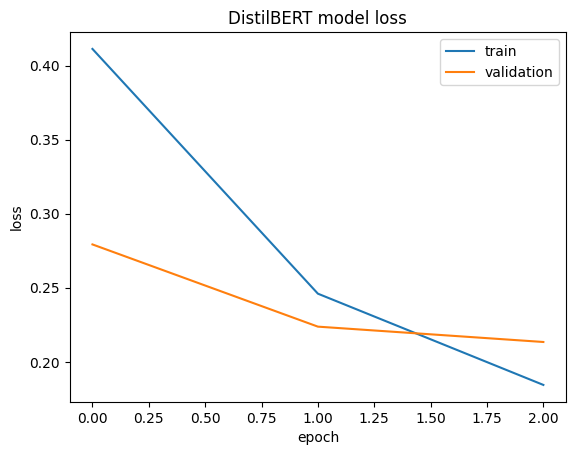

In [ ]:
plot_loss("DistilBERT model loss", DistilBERT_history)

predict the labels on test dataset

In [ ]:
DistilBERT_test_predict = DistilBERT_model.predict(test_dataset, verbose = 1)

88/88 [==============================] - 24s 253ms/step


In [ ]:
DistilBERT_test_predict

array([[0.99681807],
       [0.00712019],
       [0.01261106],
       ...,
       [0.12159306],
       [0.9961052 ],
       [0.99960154]], dtype=float32)

treat the values greater than 0.5 as label of 1, otherwise treat as label of 0

In [ ]:
DistilBERT_test_predict_label = (DistilBERT_test_predict > 0.5).astype(int).flatten()

In [ ]:
DistilBERT_test_predict_label

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
y_test_true_label = y_test.to_numpy()

In [ ]:
y_test_true_label

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

output the precision, recall, F1 score, accuracy and confusion matrix

In [ ]:
print(classification_report(y_true = y_test_true_label, y_pred = DistilBERT_test_predict_label))
print("\n\n")
print(confusion_matrix(y_true = y_test_true_label, y_pred = DistilBERT_test_predict_label))
print("\n\n")
print('testing accuracy:', np.mean(y_test_true_label == DistilBERT_test_predict_label))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2875
           1       0.91      0.93      0.92      2721

    accuracy                           0.92      5596
   macro avg       0.92      0.92      0.92      5596
weighted avg       0.92      0.92      0.92      5596




[[2630  245]
 [ 196 2525]]



testing accuracy: 0.9211937097927091


visualize the confusion matrix

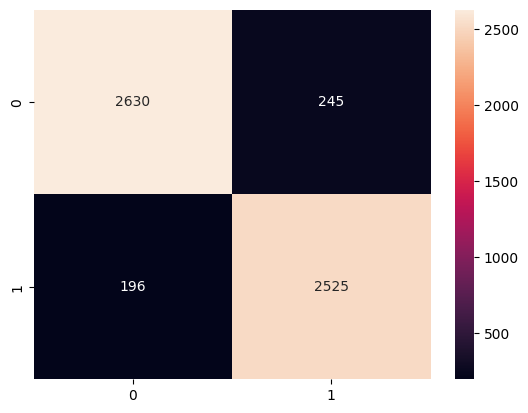

In [ ]:
DistilBERT_conf_mat = confusion_matrix(y_true = y_test_true_label, y_pred = DistilBERT_test_predict_label)
visualize_confusion_matrix(DistilBERT_conf_mat)

create the test dataset as tf.data.Dataset

In [ ]:
test_dataset_for_evaluate = (tf.data.Dataset
                 .from_tensor_slices((x_test, y_test.astype(int)))
                 .shuffle(SEED)
                 .batch(BATCH_SIZE)
                 .prefetch(AUTO))

output the train, validation and test accuracy and loss

In [ ]:
DistilBERT_train_score = DistilBERT_model.evaluate(train_dataset, batch_size = 1)
DistilBERT_valid_score = DistilBERT_model.evaluate(valid_dataset, batch_size = 1)
DistilBERT_test_score = DistilBERT_model.evaluate(test_dataset_for_evaluate, batch_size = 1)

print("training loss:", DistilBERT_train_score[0], "training accuracy", DistilBERT_train_score[1])
print("validation loss:", DistilBERT_valid_score[0], "validation accuracy", DistilBERT_valid_score[1])
print("testing loss:", DistilBERT_test_score[0], "testing accuracy", DistilBERT_test_score[1])

88/88 [==============================] - 23s 263ms/step - loss: 0.2091 - accuracy: 0.9212
training loss: 0.11809545755386353 training accuracy 0.9567694664001465
validation loss: 0.21338731050491333 validation accuracy 0.9180254340171814
testing loss: 0.20911024510860443 testing accuracy 0.9211937189102173


# **XLNet**

research paper: https://dl.acm.org/doi/pdf/10.5555/3454287.3454804

Explicitly specify we need to use transformers package from Hugging Face with version 4.31.0 (which is more stable)

In [ ]:
!pip install transformers==4.31.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.0
    Uninstalling transformers-4.40.0:
      Successfully uninstalled transformers-4.40.0


import the necessary packages and libraries

In [ ]:
import tensorflow as tf
from transformers import TFXLNetModel, XLNetTokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

read the dataset

In [ ]:
df = pd.read_csv("/content/shared/input/mental_health.csv")

split the dataser into train, validation and test dataset

In [ ]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = 0.2, random_state = 4211)

# Splitting the data into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 4211)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = 0.25, random_state = 4211, shuffle = True)

https://huggingface.co/docs/transformers/internal/tokenization_utils#transformers.PreTrainedTokenizerBase.batch_encode_plus

encode the words using the tokenizer from XLNet

In [ ]:
def XLNet_encoding(sentences, tokenizer, window_size = 1, max_length = 128):

    ID = []

    for i in tqdm(range(0, len(sentences), window_size)):
        window = sentences[i : i + window_size].tolist()
        encoding = tokenizer.batch_encode_plus(window, padding = "max_length", truncation = "longest_first", max_length = max_length)
        encoding = sum(encoding["input_ids"], [])
        ID.extend([encoding])

    return np.array(ID)

get the pretrained XLNet tokenizer

In [ ]:
XLNet_tokenizer = XLNetTokenizer.from_pretrained("xlnet-base-cased")

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

In [ ]:
XLNet_tokenizer

XLNetTokenizer(name_or_path='xlnet-base-cased', vocab_size=32000, model_max_length=1000000000000000019884624838656, is_fast=False, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '<sep>', 'pad_token': '<pad>', 'cls_token': '<cls>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=True), 'additional_special_tokens': ['<eop>', '<eod>']}, clean_up_tokenization_spaces=True)

use XLNet tokenizer to encode train, validate and test dataset

In [ ]:
x_train = XLNet_encoding(X_train.astype(str), XLNet_tokenizer)
x_valid = XLNet_encoding(X_valid.astype(str), XLNet_tokenizer)
x_test = XLNet_encoding(X_test.astype(str), XLNet_tokenizer)

100%|██████████| 5596/5596 [00:05<00:00, 1096.50it/s]


In [ ]:
print(x_train.shape)

(17904, 128)


In [ ]:
print(y_train.shape)

(17904,)


In [ ]:
print(x_valid.shape)

(4477, 128)


In [ ]:
print(y_valid.shape)

(4477,)


In [ ]:
print(x_test.shape)

(5596, 128)


In [ ]:
print(y_test.shape)

(5596,)


In [ ]:
AUTO = tf.data.experimental.AUTOTUNE

set the seed as 4211

In [ ]:
SEED = 4211

set the number of epoches, batch size and maximum length

In [ ]:
EPOCHS = 3
BATCH_SIZE = 64
MAX_LEN = 128

convert train, validation and test dataset to tf.data.Dataset

In [ ]:
train_dataset = (tf.data.Dataset
                 .from_tensor_slices((x_train, y_train.astype(int)))
                 .shuffle(SEED)
                 .batch(BATCH_SIZE)
                 .prefetch(AUTO))

valid_dataset = (tf.data.Dataset
                 .from_tensor_slices((x_valid, y_valid.astype(int)))
                 .shuffle(SEED)
                 .batch(BATCH_SIZE)
                 .prefetch(AUTO))

test_dataset = (tf.data.Dataset
                 .from_tensor_slices((x_test))
                 .batch(BATCH_SIZE))

convert the test labels as int data type

In [ ]:
y_test = y_test.astype(int)

build the XLNet model

In [ ]:
def build_XLNet(max_len = 128):

    input = Input(shape = (max_len,), name = "input", dtype = "int32")

    XLNet = TFXLNetModel.from_pretrained('xlnet-base-cased')
    XLNet_encode = XLNet(input)[0]

    sentence_encode = tf.squeeze(XLNet_encode[:, -1:, :], axis = 1)
    dropout = Dropout(0.05, name = "dropout")(sentence_encode)

    output = Dense(1, activation = "sigmoid", name = "output")(dropout)

    model = Model(inputs = [input], outputs = [output], name = "XLNet")

    model.compile(optimizer = Adam(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

check the summary of the built XLNet model

In [ ]:
XLNet_model = build_XLNet()

XLNet_model.summary()

tf_model.h5:   0%|          | 0.00/565M [00:00<?, ?B/s]

Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel were initialized from the model checkpoint at xlnet-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLNetModel for predictions without further training.


Model: "XLNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 128)]             0         
                                                                 
 tfxl_net_model (TFXLNetMod  TFXLNetModelOutput(last   116718336 
 el)                         _hidden_state=(None, 12             
                             8, 768),                            
                              mems=((128, None, 768)             
                             , (128, None, 768),                 
                              (128, None, 768),                  
                              (128, None, 768),                  
                              (128, None, 768),                  
                              (128, None, 768),                  
                              (128, None, 768),                  
                              (128, None, 768),              

Epoch 1 takes 685 seconds

Epoch 2 takes 647 seconds

Epoch 3 takes 647 seconds

In [ ]:
# XLNet_history = XLNet_model.fit(x = train_dataset, validation_data = valid_dataset, epochs = EPOCHS, batch_size = BATCH_SIZE, verbose = 1)

Epoch 1/3


328/328 [==============================] - 685s 2s/step - loss: 0.3665 - accuracy: 0.8673
Epoch 2/3
328/328 [==============================] - 647s 2s/step - loss: 0.1399 - accuracy: 0.9493
Epoch 3/3
328/328 [==============================] - 647s 2s/step - loss: 0.0810 - accuracy: 0.9716


train the model for 3 epoches

In [ ]:
XLNet_history = XLNet_model.fit(x = train_dataset, validation_data = valid_dataset, epochs = EPOCHS, verbose = 1)

Epoch 1/3


280/280 [==============================] - 640s 2s/step - loss: 0.3198 - accuracy: 0.8763 - val_loss: 0.1404 - val_accuracy: 0.9466
Epoch 2/3
280/280 [==============================] - 603s 2s/step - loss: 0.1213 - accuracy: 0.9563 - val_loss: 0.1318 - val_accuracy: 0.9544
Epoch 3/3
280/280 [==============================] - 604s 2s/step - loss: 0.0747 - accuracy: 0.9741 - val_loss: 0.2255 - val_accuracy: 0.9249


plot the XLNet model accuracy

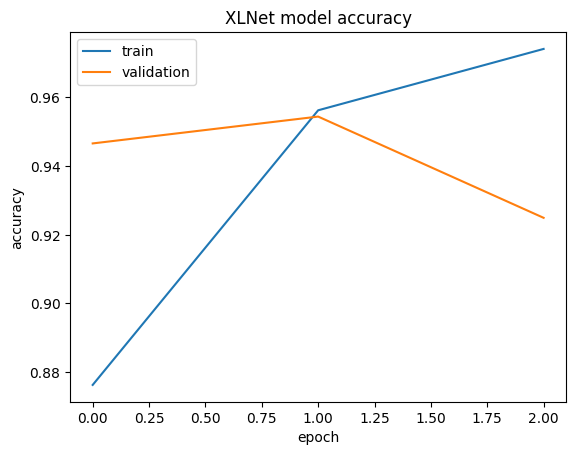

In [ ]:
plot_accuracy("XLNet model accuracy", XLNet_history)

plot the XLNet model loss

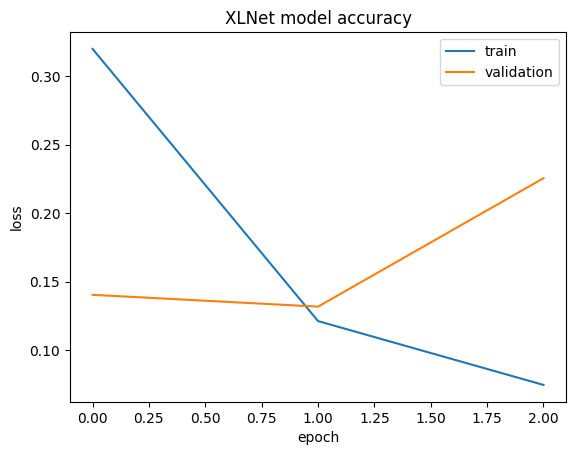

In [ ]:
plot_loss("XLNet model loss", XLNet_history)

do prediction on test dataset

In [ ]:
XLNet_test_predict = XLNet_model.predict(test_dataset, verbose = 1)

88/88 [==============================] - 61s 644ms/step


In [ ]:
XLNet_test_predict

array([[0.9999924 ],
       [0.00220863],
       [0.00185513],
       ...,
       [0.0052184 ],
       [0.99999666],
       [0.9999968 ]], dtype=float32)

we treat values greater than 0.5 as label 1, otherwise, treat it as label 0

In [ ]:
XLNet_test_predict_label = (XLNet_test_predict > 0.5).astype(int).flatten()

In [ ]:
XLNet_test_predict_label

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
y_test_true_label = y_test.to_numpy()

In [ ]:
y_test_true_label

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

output the precision, recall, F1 score, accuracy and confusion matrix

In [ ]:
print(classification_report(y_true = y_test_true_label, y_pred = XLNet_test_predict_label))
print("\n\n")
print(confusion_matrix(y_true = y_test_true_label, y_pred = XLNet_test_predict_label))
print("\n\n")
print('testing accuracy:', np.mean(y_test_true_label == XLNet_test_predict_label))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2875
           1       0.88      0.99      0.93      2721

    accuracy                           0.93      5596
   macro avg       0.93      0.93      0.93      5596
weighted avg       0.94      0.93      0.93      5596




[[2524  351]
 [  37 2684]]



testing accuracy: 0.9306647605432452


visualize the confusion matrix

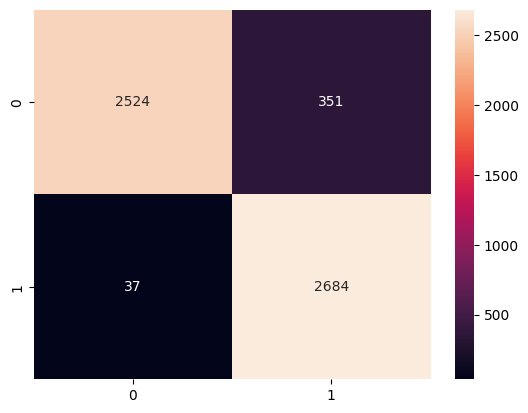

In [ ]:
XLNet_conf_mat = confusion_matrix(y_true = y_test_true_label, y_pred = XLNet_test_predict_label)
visualize_confusion_matrix(XLNet_conf_mat)

convert the test dataset to tf.data.Dataset

In [ ]:
test_dataset_for_evaluate = (tf.data.Dataset
                 .from_tensor_slices((x_test, y_test.astype(int)))
                 .shuffle(SEED)
                 .batch(BATCH_SIZE)
                 .prefetch(AUTO))

output the train, validation, test accuracy and loss

In [ ]:
XLNet_train_score = XLNet_model.evaluate(train_dataset, batch_size = 1)
XLNet_valid_score = XLNet_model.evaluate(valid_dataset, batch_size = 1)
XLNet_test_score = XLNet_model.evaluate(test_dataset_for_evaluate, batch_size = 1)

print("training loss:", XLNet_train_score[0], "training accuracy", XLNet_train_score[1])
print("validation loss:", XLNet_valid_score[0], "validation accuracy", XLNet_valid_score[1])
print("testing loss:", XLNet_test_score[0], "testing accuracy", XLNet_test_score[1])

88/88 [==============================] - 57s 646ms/step - loss: 0.2216 - accuracy: 0.9307
training loss: 0.06617478281259537 training accuracy 0.9745866656303406
validation loss: 0.2254704087972641 validation accuracy 0.9249497652053833
testing loss: 0.22163911163806915 testing accuracy 0.9306647777557373


# **Save the model and back to drive from colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# One-Hot Model
onehot100_model.save("/content/shared/output/onehot100_model.h5")
!cd "/content/shared/output" && cp -r onehot100_model.h5 "/content/drive/MyDrive/University/Courses/COMP 4211/Project/output"

onehot1000_model.save("/content/shared/output/onehot1000_model.h5")
!cd "/content/shared/output" && cp -r onehot1000_model.h5 "/content/drive/MyDrive/University/Courses/COMP 4211/Project/output"

In [ ]:
onehot100_model_complex.save("/content/shared/output/onehot100_model_comlpex.h5")
!cd "/content/shared/output" && cp -r onehot100_model_comlpex.h5 "/content/drive/MyDrive/University/Courses/COMP 4211/Project/output"

In [ ]:
# Index Model
index_model.save("/content/shared/output/index_model.h5")
!cd "/content/shared/output" && cp -r index_model.h5 "/content/drive/MyDrive/University/Courses/COMP 4211/Project/output"

In [ ]:
# CNN Model
cnn_model.save("/content/shared/output/cnn_model.h5")
!cd "/content/shared/output" && cp -r cnn_model.h5 "/content/drive/MyDrive/University/Courses/COMP 4211/Project/output"

In [ ]:
# BERT Model
# bert_model.save("/content/shared/output/bert_model.h5")
# !cd "/content/shared/output" && cp -r bert_model.h5 "/content/drive/MyDrive/University/Courses/COMP 4211/Project/output"

In [ ]:
# DistilBERT Model
DistilBERT_model.save("/content/drive/MyDrive/Project/output/DistilBERT_model.h5")
# !cd "/content/shared/output" && cp -r distilbert_model.h5 "/content/drive/MyDrive/University/Courses/COMP 4211/Project/output"

In [ ]:
# XLNet Model
XLNet_model.save("/content/drive/MyDrive/Project/output/XLNet_model.h5")
# !cd "/content/shared/output" && cp -r xlnet_model.h5 "/content/drive/MyDrive/University/Courses/COMP 4211/Project/output"

In [ ]:
drive.flush_and_unmount()